# Perfectly Adapted Signal Response

#### Author(s):  Stanley Wang
#### Reference: [Tyson et al (2003)](http://www.sciencedirect.com/science/article/pii/S0955067403000176) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/perfectly-adapted-signal-response.cpi)

This is the 4th model in the Tyson et al paper. It describes a mechanism that makes a response signal independent from the magnitude of the signal generating it.

The schematic diagram (or "wiring diagram" as it is called in the paper) can be seen in Figure 1 (d) (the first image) in the original paper. This diagram describes a process, where a response signal R is influenced by 2 stimuli. On the one hand signal S facilitates the generation of R, whereas another signal X provokes its degradation. In addition to this, there is also an interplay between S and X, namely S facilitates the generation of X.

This results in a system where upon changes to the control signal S, R responds with a sudden and rapid increase in its concentration, but after a certain amount of time R returns to its steady-state value. This means that if the concentration of S is constant, the so is the concentration of R.

In the original paper the way R returns to its steady state value is demonstrated through an iterative increase of the concentration of S after  a time frame of 4 seconds, until 20 seconds altogether. In the plot below the signals S, X and R are plotted for the first 4 seconds. It can be clearly seen how R shoots up and then returns to a steady-state value.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import singleSimulate

In [6]:
cpi_model = singleSimulate.Simulate('perfectly-adapted-signal-response')

Select the model: perfectly-adapted-signal-response
The processes in this cpi model are:
P


## Code

In [5]:
ode_def = cpi_model.view_processdef('P')

The cpi definitions of selected file are:

-- Code Snippet 4.4

species R(a,b) = a.0;

species X(a,b) = tau < 1 > .0 + b.X(a,b);

species S(a,b) = tau < 2 > .(S(a,b) | R(a,b)) + tau < 1 > .(S(a,b) | X(a,b));

process P = [1.0]S(a,b) || [0.0]X(a,b) || [1.0]R(a,b): { a - b@2 } ;


## Plot

Time Start: 0.0, Time End: 20.0, Number of Times: 200.


<IPython.core.display.Javascript object>


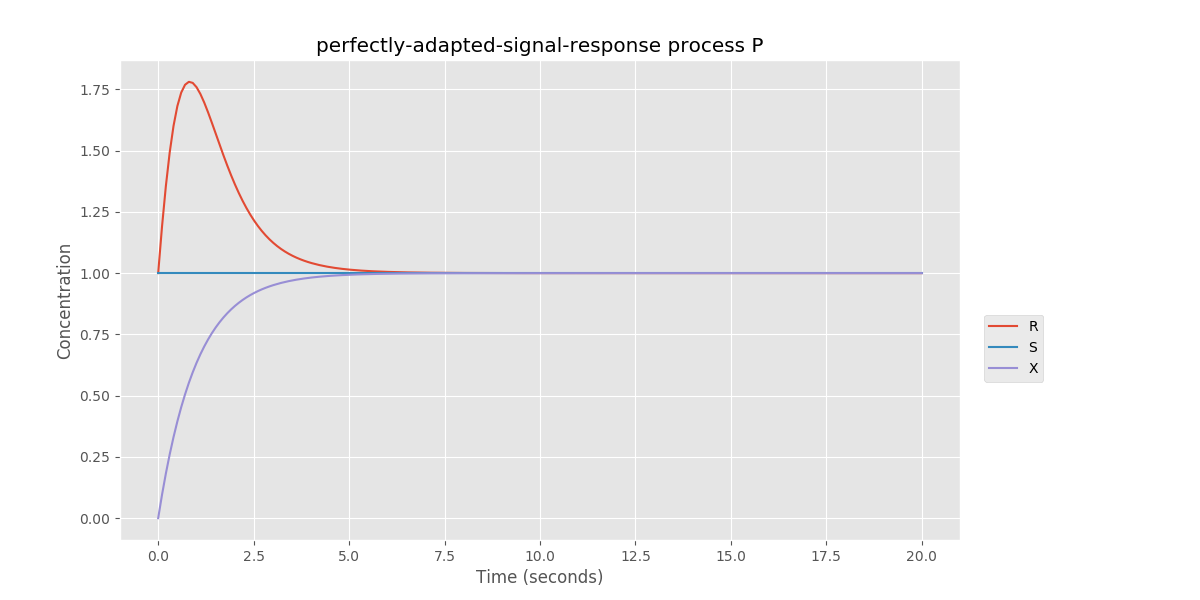

Picture will not be saved or you can change your selection.


In [12]:
solution = cpi_model.simulate_process('P','odeint', 0, 20, 200)
solution.show_plot()